# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [33]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
#import dataset

data=pd.read_csv('stroke_dataset.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

### Question to answer from data:
1. What age group is most likely to have a stroke?
2. Does gender correlate to having a stroke?
3. Which attributes are have the most correlation with having a stroke?
4. Are people that smoke are more likely to have a stroke?
5. Is hypertension and heart disease highly associated with stroke?

### Description of Information in Columns:

1. id: unique identifier

2. gender: "Male", "Female" or "Other"

3. age: age of the patient

4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. ever_married: "No" or "Yes"

7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. Residence_type: "Rural" or "Urban"

9. avg_glucose_level: average glucose level in blood

10. bmi: body mass index

11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. stroke: 1 if the patient had a stroke or 0 if not

In [35]:
#change Residence_type column to lower case to keep consistens

data.rename(columns={'Residence_type':'residence_type'}, inplace=True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
#Change all values in columns to lowercase

col_case=['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in col_case:
    data[col]=data[col].str.lower()
    
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


In [37]:
#There are 5110 rows and 12 columns in the dataset

data.shape

(5110, 12)

In [38]:
#There are no duplicates in the data

data.duplicated().sum()

0

In [39]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [43]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [44]:
data.describe(include=['object'])

,gender,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,female,yes,private,urban,never smoked
freq,2994,3353,2925,2596,1892


In [45]:
#catergorical columns data counts

cat_col=['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
for col in cat_col:
  display(pd.DataFrame(data[col].value_counts()).style.background_gradient(cmap= 'GnBu', vmin=0, subset=col))

,gender
female,2994
male,2115
other,1


,ever_married
yes,3353
no,1757


,work_type
private,2925
self-employed,819
children,687
govt_job,657
never_worked,22


,residence_type
urban,2596
rural,2514


,smoking_status
never smoked,1892
unknown,1544
formerly smoked,885
smokes,789


#### Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<AxesSubplot:>

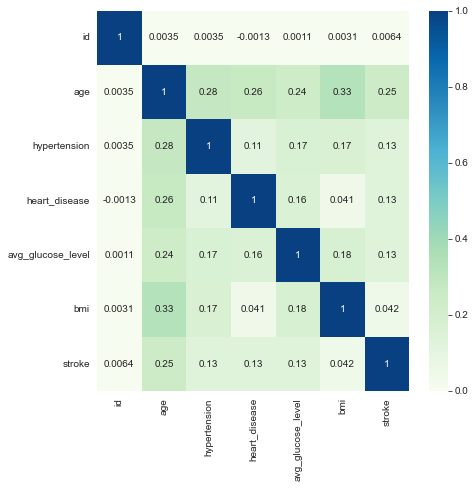

In [46]:
#correlation between numerical variables

plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap= 'GnBu')

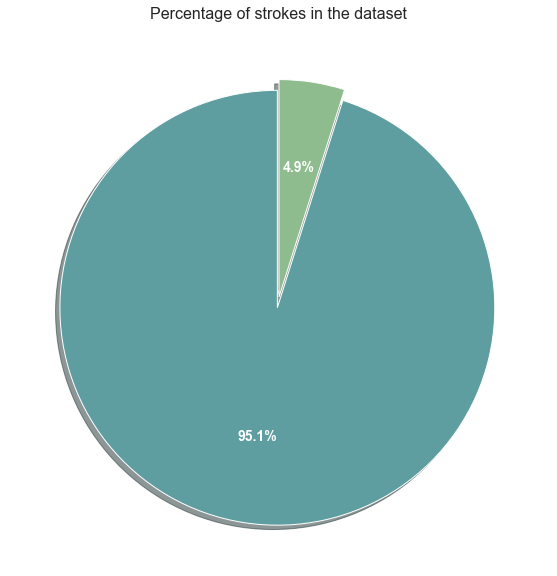

In [47]:
#Piechart of strokes in data. About 5% of people in the data have had a stroke

labels =data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["cadetblue","darkseagreen"]
explode = (0.05,0) 
 
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white', 'weight': 'bold','fontsize':14})

plt.title('Percentage of strokes in the dataset', fontsize=16)
plt.show()




<AxesSubplot:xlabel='stroke', ylabel='count'>

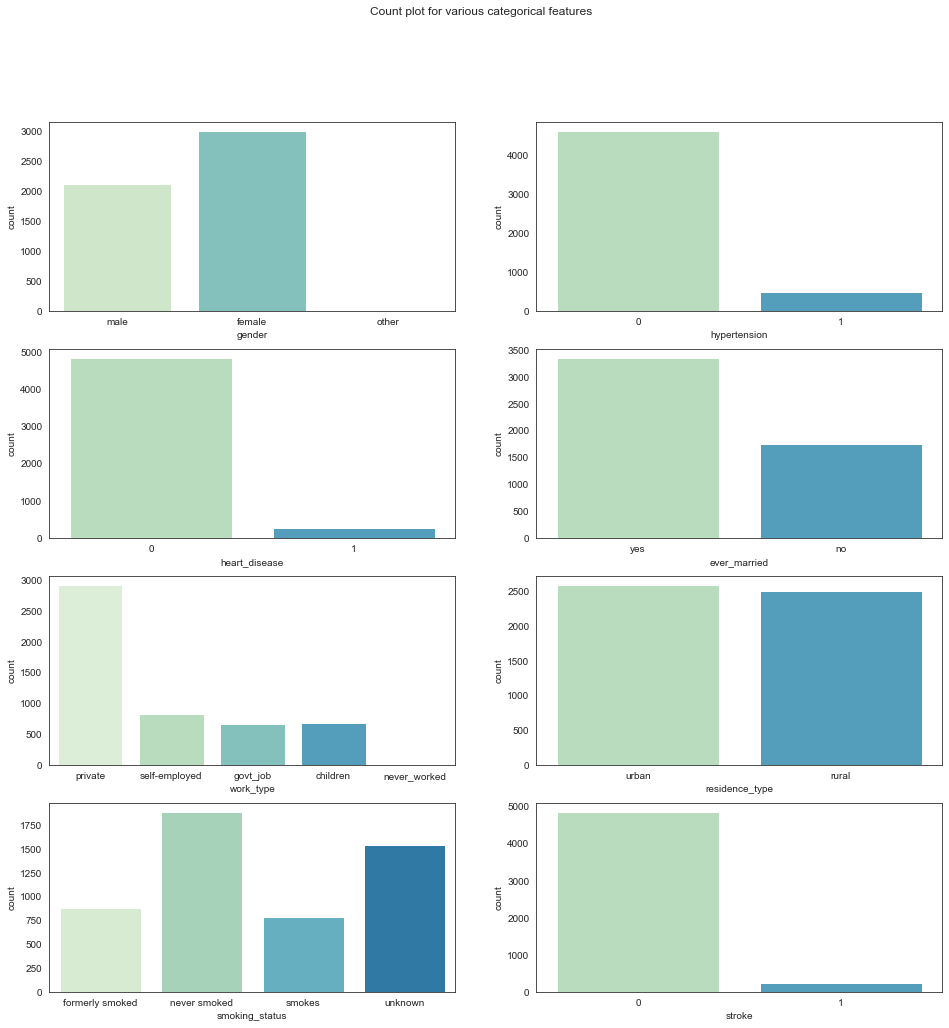

In [48]:
#Barchart the attribute counts in the dataset

fig,axes = plt.subplots(4,2,figsize = (16,16))
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=data,x='gender', palette="GnBu")
sns.countplot(ax=axes[0,1],data=data,x='hypertension', palette="GnBu")
sns.countplot(ax=axes[1,0],data=data,x='heart_disease', palette="GnBu")
sns.countplot(ax=axes[1,1],data=data,x='ever_married', palette="GnBu")
sns.countplot(ax=axes[2,0],data=data,x='work_type', palette="GnBu")
sns.countplot(ax=axes[2,1],data=data,x='residence_type', palette="GnBu")
sns.countplot(ax=axes[3,0],data=data,x='smoking_status', palette="GnBu")
sns.countplot(ax=axes[3,1],data=data,x='stroke', palette="GnBu")

#More females in dataset than males
#Majority of people in dataset do not have hypertension or heart disease
#Mostly private work
#About equal amounts of urban and rural residence
#Alot of unknown smoking status


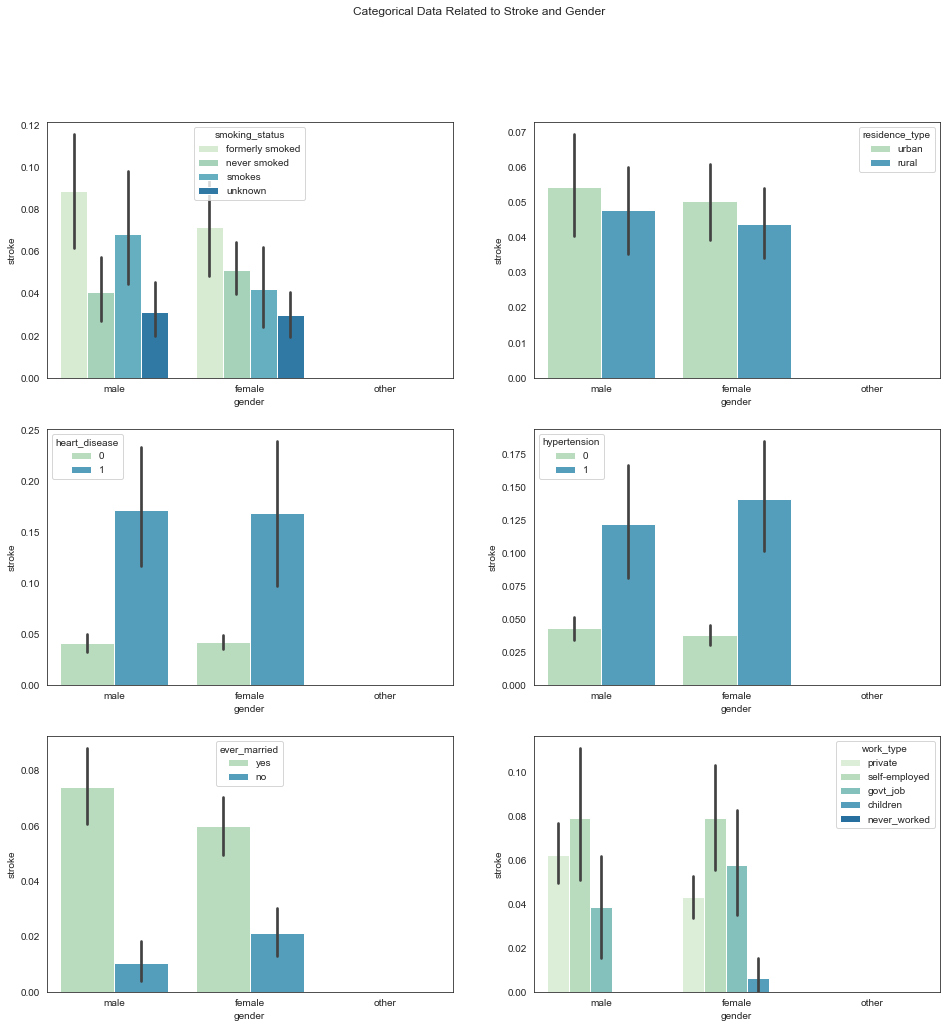

In [49]:
#graphs describing attributes according to gender and stroke. 
fig,axes = plt.subplots(3,2,figsize = (16,16))
fig.suptitle("Categorical Data Related to Stroke and Gender")


sns.barplot(ax=axes[0,0], x="gender", y="stroke", hue="smoking_status", palette="GnBu", data=data)
sns.barplot(ax=axes[0,1], x="gender", y="stroke", hue="residence_type", palette="GnBu", data=data)
sns.barplot(ax=axes[1,0], x="gender", y="stroke", hue="heart_disease", palette="GnBu", data=data)
sns.barplot(ax=axes[1,1], x="gender", y="stroke", hue="hypertension", palette="GnBu", data=data)
sns.barplot(ax=axes[2,0], x="gender", y="stroke", hue="ever_married", palette="GnBu", data=data)
sns.barplot(ax=axes[2,1], x="gender", y="stroke", hue="work_type", palette="GnBu", data=data)
plt.show()

#former smokers have the highest risk of stroke
#residence type has low impact on stroke status
#heart disease greatly increases risk of stroke
#hypertension highly increases risk of stroke
#being married increases chances of stroke.

Text(0, 0.5, 'Percent')

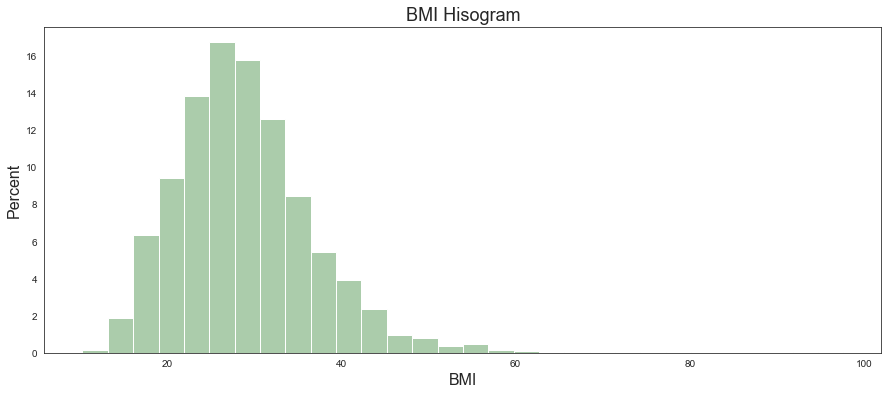

In [50]:
#BMI hisogram. Normal BMI is 18.5-24.9
#Skewed to the left

sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.histplot(data, x='bmi', color='darkseagreen', bins=30, stat= 'percent')
plt.title('BMI Hisogram', fontsize=18)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Percent', fontsize=16)



Text(0, 0.5, 'Percent')

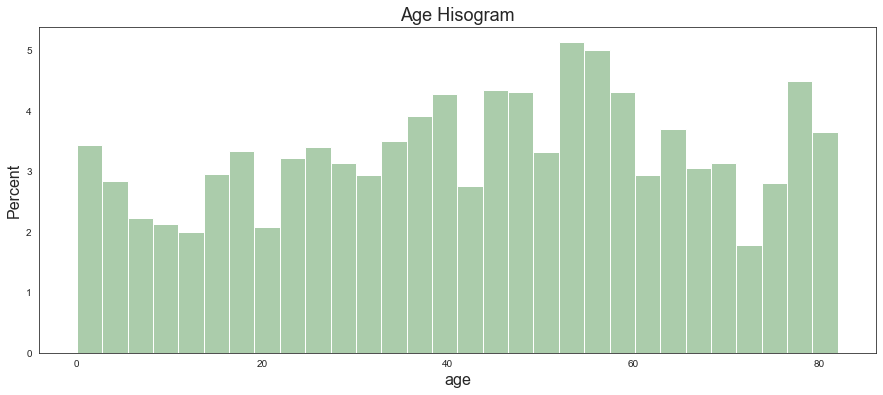

In [51]:
#there is a good distribution of age

color=sns.color_palette('GnBu')
sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.histplot(data, x='age', color='darkseagreen', bins=30, stat= 'percent')
plt.title('Age Hisogram', fontsize=18)
plt.xlabel('age', fontsize=16)
plt.ylabel('Percent', fontsize=16)

Text(0, 0.5, 'Percent')

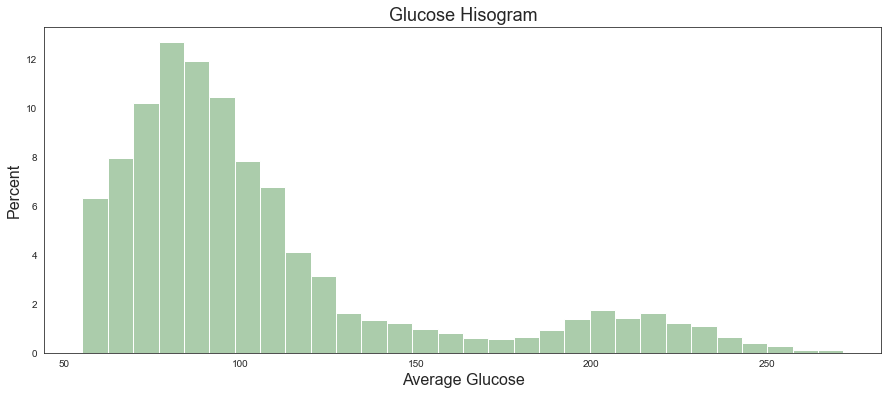

In [52]:
#histogram of glucose levels. Normal fasting glucose is 70-99mg/dL and after eating is <140mg/dL

color=sns.color_palette('GnBu')
sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.histplot(data, x='avg_glucose_level', color='darkseagreen', bins=30, stat= 'percent')
plt.title('Glucose Hisogram', fontsize=18)
plt.xlabel('Average Glucose', fontsize=16)
plt.ylabel('Percent', fontsize=16)

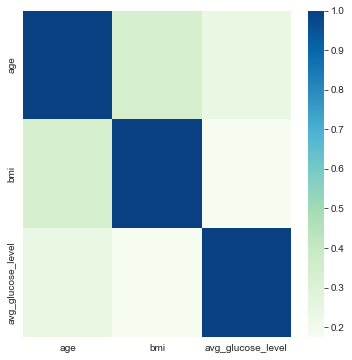

In [53]:
numerical=['age', 'bmi', 'avg_glucose_level']
num = data[numerical].corr(method='pearson')
plt.figure(figsize = (6,6))
sns.heatmap(num,cmap="GnBu")
plt.show()

#age and bmi/average glucose have a stronger correlation than bmi and average glucose

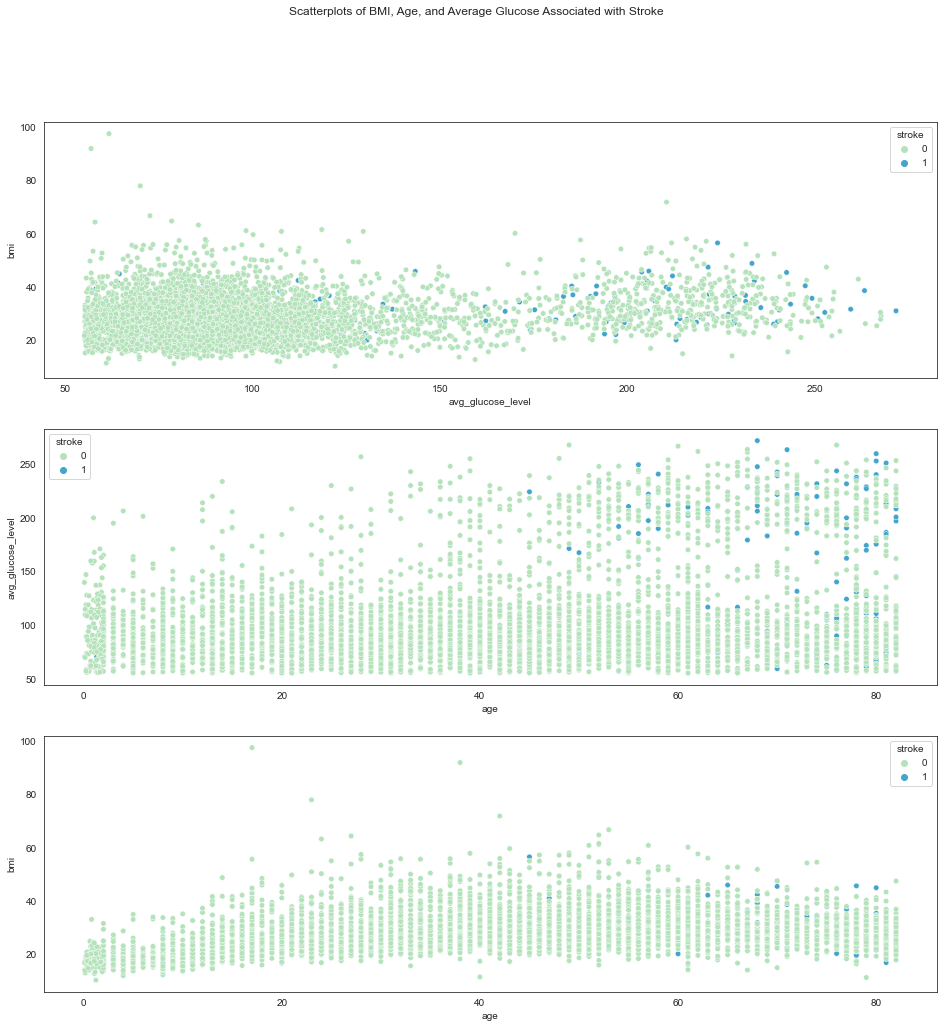

In [54]:
fig,axes = plt.subplots(3,1,figsize = (16,16))
fig.suptitle("Scatterplots of BMI, Age, and Average Glucose Associated with Stroke")

sns.scatterplot(ax=axes[0], data = data, x = 'avg_glucose_level', y = 'bmi', hue='stroke', palette='GnBu', s=30)
sns.scatterplot(ax=axes[1], data = data, x = 'age', y = 'avg_glucose_level', hue='stroke', palette='GnBu', s=30)
sns.scatterplot(ax=axes[2], data = data, x = 'age', y = 'bmi', hue='stroke', palette='GnBu', s=30)

plt.show()

#greater chance of stroke with higher average glucose. Outliers in BMI.
#greater chance of stroke with increased age and glucose average

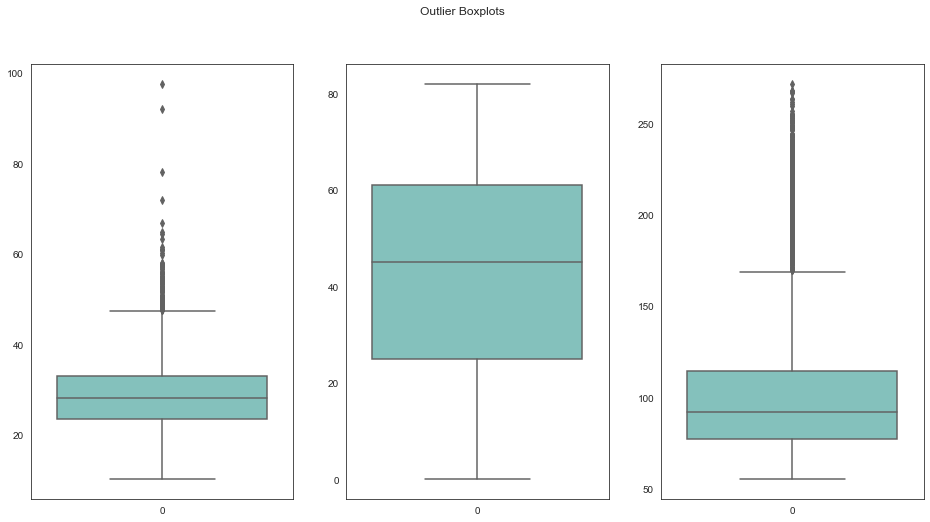

In [62]:
#BMI and average glucose contains outliers but not many.

fig,axes = plt.subplots(1, 3,figsize = (16,8))
fig.suptitle("Outlier Boxplots")


sns.boxplot(ax=axes[0], palette="GnBu", data=(data['bmi']))
sns.boxplot(ax=axes[1], palette="GnBu", data=data['age'])
sns.boxplot(ax=axes[2], palette="GnBu", data=data['avg_glucose_level'])

plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? Average glucose does not have a strong correlation with bmi. More former smokers have had strokes than current smokers. Only about 5% of people in the dataset have had a stroke.
2. Do you have any concerns about your dataset? Only a few of the parameters have strong correlations. Only 5% of the people in the dataset have had a stroke. Alot of the smoking statuses are unknown.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? BMI and average glucose conatains outliers but not many. Gender contains 1 record of 'other'.